In [1]:
import glob
import os, time
#import itertools
import numpy as np
import seaborn as sns
import pandas as pd
from natsort import natsorted


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from cycler import cycler
#from datetime import datetime, timedelta

#from scipy.stats import norm
#from scipy.optimize import curve_fit #we could import more, but this is what we need
#from scipy.stats import linregress

#from misc_process import normalize_max

%matplotlib inline

In [9]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'atinary','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')

# # get the path to the folder with generated csv data
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')



In [10]:
# Path to folder containing CSV files
folder_path = DATA_UV_DIR_PATH

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

csv_files

['D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\1_ar-exp-20.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\2_mg_exp20.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\3_aj_exp2_redo.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\3_ym_exp20.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\4_zl_exp6.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\5_mg_exp14.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\6_ym_exp14.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\7_ar-exp1_11.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\8_ar-exp10.csv',
 'D:\\1_projects\\01-cfm-13-01-2023\\Pr004_chemOS-for-submission\\data\\atinary\\zz-el-sayed-rt.csv']

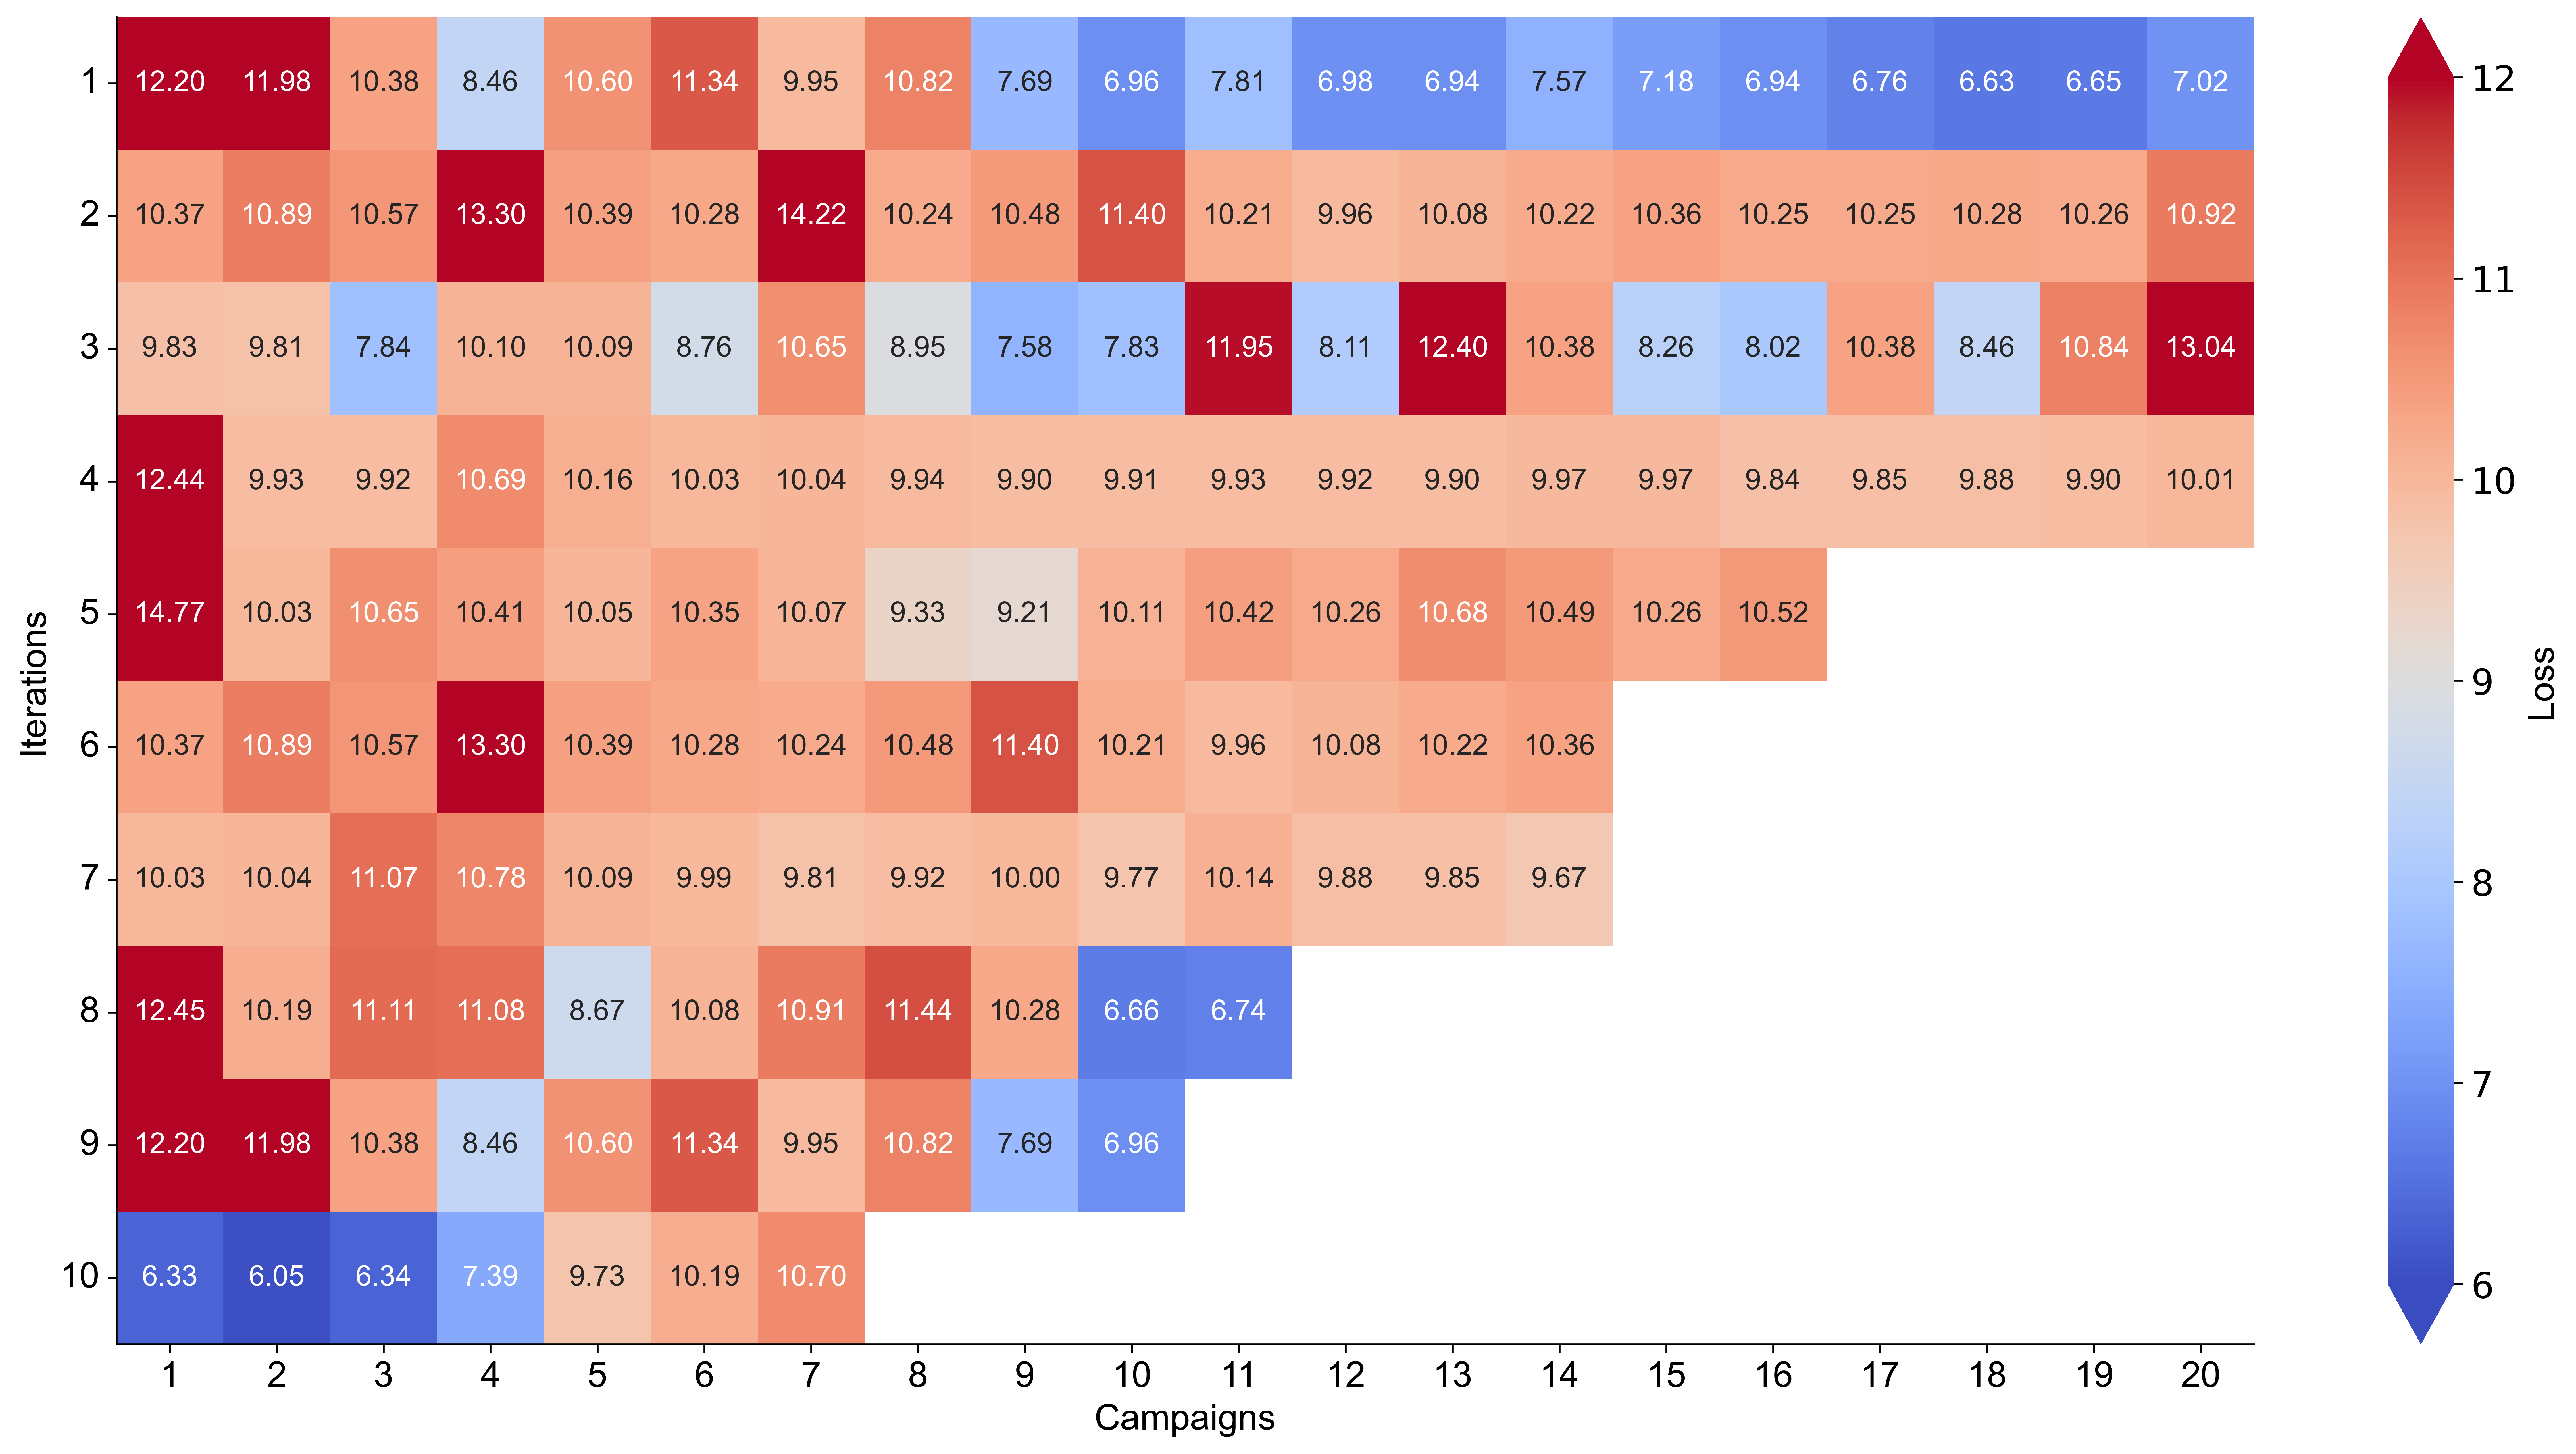

In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# Define the data and result folders
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'atinary')
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs')

# Path to the folder containing CSV files
folder_path = DATA_DIR_PATH

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Define the intensity column for each CSV file
intensity_columns = {
    csv_files[0]: 'loss',
    csv_files[1]: 'loss',
    csv_files[2]: 'loss',
    csv_files[3]: 'loss',
    csv_files[4]: 'loss',
    csv_files[5]: 'loss',
    csv_files[6]: 'loss',
    csv_files[7]: 'loss',
    csv_files[8]: 'loss',
    csv_files[9]: 'loss'
    # Add more files and their corresponding intensity columns as needed
}

# Calculate the number of rows and columns for the subplots
num_rows = len(csv_files)
num_cols = 1

# Create a list to store all the dataframes for heatmaps
all_data = []

# Process all CSV files using a loop
for idx, csv_file in enumerate(csv_files):
    title = f'Experiment {idx+1}'
    intensity_column = intensity_columns.get(csv_file)
    if intensity_column is None:
        raise ValueError(f"Intensity column not defined for file: {csv_file}")
    
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Ensure the DataFrame has 20 rows (iterations)
    df = df.iloc[:20, :]
    
    # Create a DataFrame with 20 iterations (x_data) and fill missing intensity values with NaN
    x_data = np.linspace(0, 19, 20)
    data = pd.DataFrame({'x': x_data, 'y': idx+1})
    data = data.merge(df[[intensity_column]], left_on='x', right_index=True, how='left')
    data.rename(columns={intensity_column: 'intensity'}, inplace=True)
    
    all_data.append(data)

# Combine all the dataframes into a single dataframe
combined_data = pd.concat(all_data)

# Create a custom colormap with blue, grey, and red colors
colors = [
    (0.0, 'darkblue'),       # Blue at value 8 and below
    (0.5, 'whitesmoke'),       # Grey at value 8.45 (midpoint between 8 and 8.9)
    (1.0, 'lightcoral'),        # Red at value 8.9 and above
]
cmap = LinearSegmentedColormap.from_list('custom_colormap', colors)

# Set the lower and upper limits for intensity values
lower_limit = 6
upper_limit = 12

# Increase the font size for colorbar heading
cbar_font = {'family': 'Arial', 'size': 15}

# Create the single heatmap with all experiments' data using Seaborn's coolwarm palette
fig = plt.figure(figsize=(2.0 * (1 * num_rows), 1 * num_rows), dpi=600)  # generate a figure

ax = sns.heatmap(combined_data.pivot('y', 'x', 'intensity'), cmap='coolwarm', annot=True, fmt='.2f', cbar=True,
                 mask=combined_data.pivot('y', 'x', 'intensity').isnull(),
                 cbar_kws={'label': 'Intensity', 'extend': 'both'}, vmin=lower_limit, vmax=upper_limit,
                 annot_kws={'fontfamily': 'Arial', 'fontsize': 12})  # Leave annot font size as it is

# Get the colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

# Set font size for colorbar heading
cbar.set_label('Loss', **cbar_font)
font = {'family': 'Arial', 'size': 15}
plt.xlabel('Campaigns', fontdict=font)
plt.ylabel('Iterations', fontdict=font)
plt.xticks(fontname='Arial', fontsize=15)
plt.yticks(fontname='Arial', fontsize=15, rotation=0)

# Set the x-axis ticks and labels for the iterations
ax.set_xticks(np.arange(20) + 0.5)  # Shift the ticks to be centered under each cell
ax.set_xticklabels(np.arange(1, 21))  # Set the x-axis labels from 1 to 20

# Add spines on left and bottom axes
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

plt.show()

fig.savefig(RESULT_DIR_PATH + 'Fig_4.pdf',  bbox_inches ='tight', transparent = True)

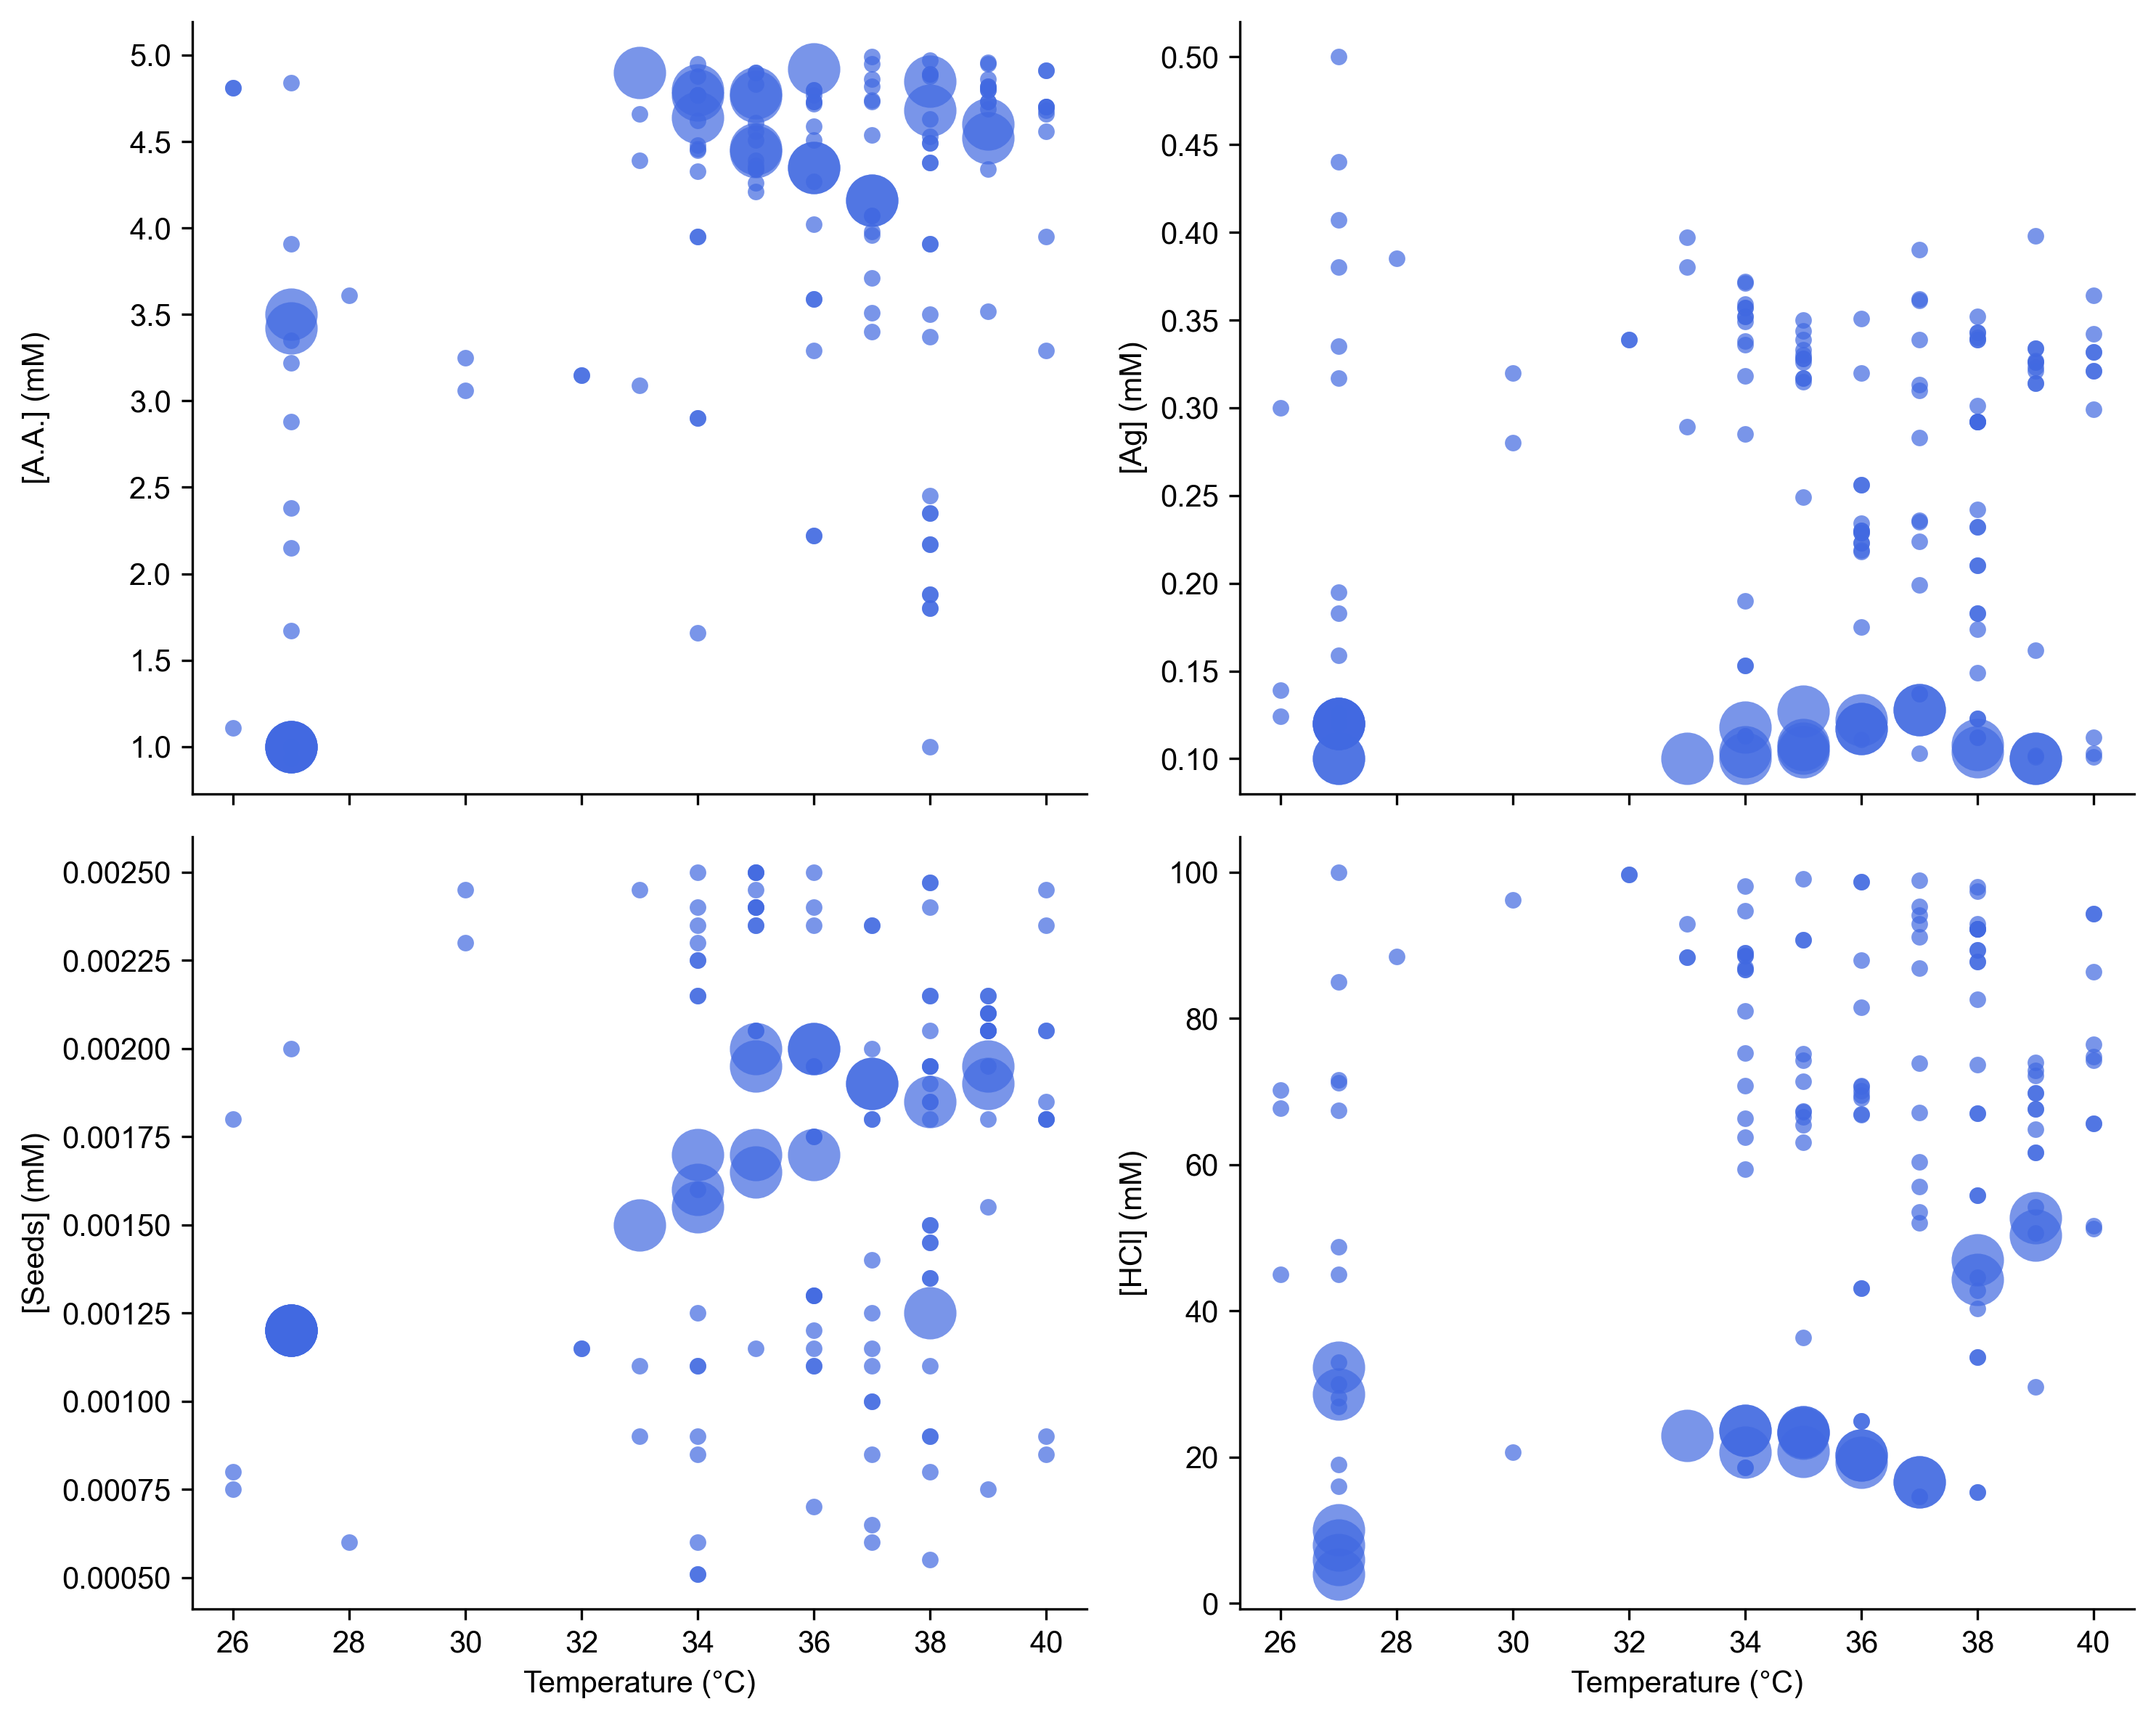

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Arial'

# Sample list of 8 CSV files (replace these with your own file paths)
csv_files = [
    csv_files[0], 
    csv_files[1], 
    csv_files[2], 
    csv_files[3], 
    csv_files[4], 
    csv_files[5], 
    csv_files[6], 
    csv_files[7],
    csv_files[8],
    csv_files[9]
]

# Define columns for x, y, and intensity data
column_mapping = {
    'x_data': 'temp',
    'y_data_1': 'Asc-acid',
    'y_data_2': 'silver',
    'y_data_3': 'seeds',
    'y_data_4': 'hcl',
    'intensity': 'loss'
}

# Custom y-axis labels
y_axis_labels = {
    'y_data_1': '[A.A.] (mM)',
    'y_data_2': '[Ag] (mM)',
    'y_data_3': '[Seeds] (mM)',
    'y_data_4': '[HCl] (mM)'
}

# Create empty DataFrames to store data from all CSV files
all_data = []

# Process all CSV files using a loop
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    
    # Extract x, y, and intensity data from the current DataFrame using the specified columns
    data = {col: df[col_name] for col, col_name in column_mapping.items()}
    
    # Convert the data dictionary to a DataFrame
    data_df = pd.DataFrame(data)
    
    # Append the data DataFrame to the list
    all_data.append(data_df)

# Concatenate the DataFrames from all CSV files
combined_data = pd.concat(all_data, ignore_index=True)

# Create the scatter plots with combined data
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, dpi=300)

y_axes = ['y_data_1', 'y_data_2', 'y_data_3', 'y_data_4']
y_mult_fac = [0.01, 0.001, 0.00005, 0.1]

for i, ax in enumerate(axes.flatten()):
    y_data_column = y_axes[i]
    y_multiplier = y_mult_fac[i]
    
    # Create a new column with scaled y-values
    combined_data[f'scaled_{y_data_column}'] = combined_data[y_data_column] * y_multiplier
    
    # Filter data with intensity values larger than 8.0
    filtered_data = combined_data[combined_data['intensity'] > 8.0]
    
    # Set the color to 'royalblue'
    sns.scatterplot(x='x_data', y=f'scaled_{y_data_column}', data=filtered_data, color='royalblue', s=30, linewidth=0, alpha=0.7, ax=ax)
    
    # Filter data with intensity values smaller than or equal to 8.0
    filtered_data = combined_data[combined_data['intensity'] <= 8.0]
    
    # Set the color to 'royalblue'
    sns.scatterplot(x='x_data', y=f'scaled_{y_data_column}', data=filtered_data, color='royalblue', s=300, linewidth=0, alpha=0.7, ax=ax)
    
    ax.set_xlabel('Temperature (\N{DEGREE SIGN}C)', fontsize = 'medium', font = 'Arial')
    
    # Set custom y-axis labels
    ax.set_ylabel(y_axis_labels[y_data_column], fontsize = 'medium', font = 'Arial')
    
    # Remove the top and right spines from all subplots
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Remove subplot titles
    ax.set_title('')

fig.align_ylabels()
# Adjust spacing
plt.tight_layout()

plt.show()

fig.savefig(RESULT_DIR_PATH + 'Fig_5.pdf', transparent=True, bbox_inches = 'tight')